In [3]:
# jupyter core
from IPython.core.display      import display, HTML
from IPython.display           import Image

# requests
from urllib.request import Request, urlopen, urlretrieve
from urllib.error import URLError, HTTPError

# scraping
from bs4 import BeautifulSoup

# data manipulation
import numpy as np
import pandas as pd
import re

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def jupyter_settings():
    !matplotlib inline
    !pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]

    plt.rcParams['font.size'] = 12
    
    display(HTML("<style>.container { width:100% !important; }</style>"))
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()

In [5]:
jupyter_settings()

'matplotlib' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.
'pylab' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/olx-natalrent-01/OLX.csv


In [3]:
df = pd.read_csv('/kaggle/input/olx-natalrent-01/OLX.csv')
df

,Unnamed: 0,NOME,VALOR,DETALHES,ENDEREÇO
0,0,Excelente apartamento na Av. 9 Coronel Estevam,R$ 450,"['1 quarto ', ' 45m²']",Alecrim
1,1,"Kitnet com 1 dormitório para alugar, 12 m² por...",R$ 1.000,"['1 quarto ', ' 12m² ', ' 1 vaga']",Capim Macio
2,2,Aluguel -Apto 2/4 C das Dunas (Próximo a Lojas...,R$ 1.400,"['2 quartos ', ' 56m² ', ' Condomínio: R$ 0 ',...",Capim Macio
3,3,Condomínio Natal Brisa - Cidade Satélite - Apa...,R$ 1.500,"['2 quartos ', ' 56m² ', ' 1 vaga']",Pitimbu
4,4,Kitinet excelente localização Ponta Negra,R$ 900,"['1 quarto ', ' 14m² ', ' Condomínio: R$ 0']",Ponta Negra
...,...,...,...,...,...
1443,1443,Locação - Estrela do Atlântico (Andar Alto),R$ 2.200,"['2 quartos ', ' 59m² ', ' 1 vaga']",Ponta Negra
1444,1444,Apto Tirol aluguel,R$ 3.750,"['4 quartos ', ' 190m² ', ' 2 vagas']",Tirol
1445,1445,Apartamento para alugar com 2 dormitórios em N...,R$ 550,"['2 quartos ', ' 70m² ', ' Condomínio: R$ 320 ...",Neópolis
1446,1446,Apartamento para alugar com 1 dormitórios em C...,R$ 600,"['1 quarto ', ' 55m² ', ' Condomínio: R$ 391 '...",Candelária


In [4]:
import re

In [5]:
f_quarto = lambda x: re.findall('[0-9]+ quartos?', str(x))
f_area = lambda x: re.findall('[0-9]+m²', str(x))
f_condominio = lambda x: re.findall('Condomínio: R\$\ [0-9]+', str(x))
f_vaga = lambda x: re.findall('[0-9]+ vagas?', str(x))
f_valor = lambda x: x.split()[-1]

In [6]:
df1 = pd.DataFrame()
df1['N° QUARTOS'] = list(map(f_quarto, df['DETALHES']))
df1['ÁREA (m²)'] = list(map(f_area, df['DETALHES']))
df1['CONDOMINIO'] = list(map(f_condominio, df['DETALHES']))
df1['VAGAS'] = list(map(f_vaga, df['DETALHES']))
df1['VALOR'] = list(map(f_valor, df['VALOR'].astype(str)))
df1

,N° QUARTOS,ÁREA (m²),CONDOMINIO,VAGAS,VALOR
0,[1 quarto],[45m²],[],[],450
1,[1 quarto],[12m²],[],[1 vaga],1.000
2,[2 quartos],[56m²],[Condomínio: R$ 0],[1 vaga],1.400
3,[2 quartos],[56m²],[],[1 vaga],1.500
4,[1 quarto],[14m²],[Condomínio: R$ 0],[],900
...,...,...,...,...,...
1443,[2 quartos],[59m²],[],[1 vaga],2.200
1444,[4 quartos],[190m²],[],[2 vagas],3.750
1445,[2 quartos],[70m²],[Condomínio: R$ 320],[1 vaga],550
1446,[1 quarto],[55m²],[Condomínio: R$ 391],[1 vaga],600


In [7]:
f1_quarto = lambda x: re.findall('[0-9]+', str(x))
f1_area = lambda x: re.findall('[0-9]+', str(x))
f1_condominio = lambda x: re.findall('[0-9]+', str(x))
f1_vaga = lambda x: re.findall('[0-9]+', str(x))

df2 = pd.DataFrame()
df2['N° QUARTOS'] = list(map(f1_quarto, df1['N° QUARTOS']))
df2['ÁREA (m²)'] = list(map(f1_area, df1['ÁREA (m²)']))
df2['CONDOMINIO'] = list(map(f1_condominio, df1['CONDOMINIO']))
df2['VAGAS'] = list(map(f1_vaga, df1['VAGAS']))
df2['VALOR'] = df1['VALOR']
df2[['NOME', 'ENDEREÇO']] = df[['NOME', 'ENDEREÇO']]

In [8]:
df3 = pd.DataFrame()
df3 = df2[['NOME', 'ENDEREÇO', 'N° QUARTOS', 'ÁREA (m²)', 'CONDOMINIO', 'VAGAS', 'VALOR']]

In [9]:
df3

,NOME,ENDEREÇO,N° QUARTOS,ÁREA (m²),CONDOMINIO,VAGAS,VALOR
0,Excelente apartamento na Av. 9 Coronel Estevam,Alecrim,[1],[45],[],[],450
1,"Kitnet com 1 dormitório para alugar, 12 m² por...",Capim Macio,[1],[12],[],[1],1.000
2,Aluguel -Apto 2/4 C das Dunas (Próximo a Lojas...,Capim Macio,[2],[56],[0],[1],1.400
3,Condomínio Natal Brisa - Cidade Satélite - Apa...,Pitimbu,[2],[56],[],[1],1.500
4,Kitinet excelente localização Ponta Negra,Ponta Negra,[1],[14],[0],[],900
...,...,...,...,...,...,...,...
1443,Locação - Estrela do Atlântico (Andar Alto),Ponta Negra,[2],[59],[],[1],2.200
1444,Apto Tirol aluguel,Tirol,[4],[190],[],[2],3.750
1445,Apartamento para alugar com 2 dormitórios em N...,Neópolis,[2],[70],[320],[1],550
1446,Apartamento para alugar com 1 dormitórios em C...,Candelária,[1],[55],[391],[1],600


# N° Quartos

In [10]:
n = df3['N° QUARTOS'].astype(str)
def content_from_lists(n):
    lst = []
    for i in n:
        if len(i)>3:
            lst.append(i[-3])
        else:
            lst.append('') # valores vazios são interpretados como kitnets e inse-re-se 1 quarto
    lst = pd.to_numeric(lst)
    return lst
    print('The result is a list "lst": ', lst)
    
content_from_lists(n)

array([1., 1., 2., ..., 2., 1., 3.])

In [11]:
a = pd.Series(content_from_lists(n), dtype=int)

In [12]:
print(a)

0       1.0
1       1.0
2       2.0
3       2.0
4       1.0
       ... 
1443    2.0
1444    4.0
1445    2.0
1446    1.0
1447    3.0
Length: 1448, dtype: float64


In [13]:
a = [int(i) for i in a] 

ValueError: cannot convert float NaN to integer

In [14]:
df3['N° QUARTOS'] = a

In [15]:
df3.head(20)

,NOME,ENDEREÇO,N° QUARTOS,ÁREA (m²),CONDOMINIO,VAGAS,VALOR
0,Excelente apartamento na Av. 9 Coronel Estevam,Alecrim,1.0,[45],[],[],450
1,"Kitnet com 1 dormitório para alugar, 12 m² por...",Capim Macio,1.0,[12],[],[1],1.000
2,Aluguel -Apto 2/4 C das Dunas (Próximo a Lojas...,Capim Macio,2.0,[56],[0],[1],1.400
3,Condomínio Natal Brisa - Cidade Satélite - Apa...,Pitimbu,2.0,[56],[],[1],1.500
4,Kitinet excelente localização Ponta Negra,Ponta Negra,1.0,[14],[0],[],900
5,Apartamento com 198 metros em lagoa nova próxi...,Lagoa Nova,3.0,[198],[0],[3],2.500
6,Apartamento em barro vermelho próximo da regul...,Barro Vermelho,2.0,[57],[0],[1],1.500
7,Apartamento em lagoa nova com 3\4 próximo da J...,Lagoa Nova,3.0,[100],[0],[1],900
8,Lindo apartamento mobiliado próximo da br 101 ...,Pitimbu,2.0,[55],[0],[1],1.600
9,"Apartamento com 3 dormitórios para alugar, 148...",Capim Macio,3.0,[148],[],[2],3.000


# Área

In [16]:
str(df3['ÁREA (m²)'].to_list()[17])

'[]'

In [17]:
lit_s = []
for i in df3['ÁREA (m²)'].to_list():
    if str(i) == '[]':
        print(0)
        lit_s.append(int(0))
    else:
        print(i[0])
        lit_s.append(int(i[0]))
lit_s = to_numeric(lit_s)

45
12
56
56
14
198
57
100
55
148
57
120
17
0
76
35
97
0
0
0
58
46
66
65
15
55
54
56
40
0
0
150
50
110
61
25
55
70
55
56
57
59
92
80
25
30
25
90
50
45
30
85
65
55
97
0
58
66
68
55
56
55
0
45
57
55
170
60
0
52
48
0
0
55
35
66
0
57
57
0
0
25
56
50
55
0
56
49
36
220
0
78
98
60
55
0
59
286
55
116
56
0
63
43
0
54
67
55
55
50
56
56
55
0
45
27
55
116
60
32
123
92
0
68
120
56
60
56
193
56
193
0
57
78
57
67
50
49
78
58
0
59
160
49
60
50
59
108
110
282
108
56
80
59
55
76
54
55
56
0
58
55
45
0
0
70
59
56
55
30
86
104
59
56
34
108
55
76
0
45
38
0
55
55
57
55
56
70
85
56
0
59
25
0
98
60
92
57
73
30
52
75
0
59
47
6
46
56
59
56
96
40
58
0
63
0
57
30
0
80
55
59
55
55
0
0
68
76
60
58
80
58
0
70
52
0
0
74
0
55
0
0
61
29
30
0
80
90
115
67
0
40
56
117
61
77
0
63
43
35
57
0
33
0
82
100
56
30
0
55
64
56
55
90
54
26
0
46
0
52
56
105
120
57
99
170
55
25
57
40
46
30
35
25
67
52
117
54
79
57
48
86
76
38
183
55
110
60
0
75
59
100
57
53
63
0
50
95
40
79
80
20
63
34
63
53
67
39
56
59
56
57
60
0
38
0
56
0
61
0
46
0


NameError: name 'to_numeric' is not defined

In [18]:
lit_s

[45,
 12,
 56,
 56,
 14,
 198,
 57,
 100,
 55,
 148,
 57,
 120,
 17,
 0,
 76,
 35,
 97,
 0,
 0,
 0,
 58,
 46,
 66,
 65,
 15,
 55,
 54,
 56,
 40,
 0,
 0,
 150,
 50,
 110,
 61,
 25,
 55,
 70,
 55,
 56,
 57,
 59,
 92,
 80,
 25,
 30,
 25,
 90,
 50,
 45,
 30,
 85,
 65,
 55,
 97,
 0,
 58,
 66,
 68,
 55,
 56,
 55,
 0,
 45,
 57,
 55,
 170,
 60,
 0,
 52,
 48,
 0,
 0,
 55,
 35,
 66,
 0,
 57,
 57,
 0,
 0,
 25,
 56,
 50,
 55,
 0,
 56,
 49,
 36,
 220,
 0,
 78,
 98,
 60,
 55,
 0,
 59,
 286,
 55,
 116,
 56,
 0,
 63,
 43,
 0,
 54,
 67,
 55,
 55,
 50,
 56,
 56,
 55,
 0,
 45,
 27,
 55,
 116,
 60,
 32,
 123,
 92,
 0,
 68,
 120,
 56,
 60,
 56,
 193,
 56,
 193,
 0,
 57,
 78,
 57,
 67,
 50,
 49,
 78,
 58,
 0,
 59,
 160,
 49,
 60,
 50,
 59,
 108,
 110,
 282,
 108,
 56,
 80,
 59,
 55,
 76,
 54,
 55,
 56,
 0,
 58,
 55,
 45,
 0,
 0,
 70,
 59,
 56,
 55,
 30,
 86,
 104,
 59,
 56,
 34,
 108,
 55,
 76,
 0,
 45,
 38,
 0,
 55,
 55,
 57,
 55,
 56,
 70,
 85,
 56,
 0,
 59,
 25,
 0,
 98,
 60,
 92,
 57,
 73,
 30,
 52,
 75

In [19]:
df3['ÁREA (m²)'] = pd.Series(lit_s)

In [20]:
df3

,NOME,ENDEREÇO,N° QUARTOS,ÁREA (m²),CONDOMINIO,VAGAS,VALOR
0,Excelente apartamento na Av. 9 Coronel Estevam,Alecrim,1.0,45,[],[],450
1,"Kitnet com 1 dormitório para alugar, 12 m² por...",Capim Macio,1.0,12,[],[1],1.000
2,Aluguel -Apto 2/4 C das Dunas (Próximo a Lojas...,Capim Macio,2.0,56,[0],[1],1.400
3,Condomínio Natal Brisa - Cidade Satélite - Apa...,Pitimbu,2.0,56,[],[1],1.500
4,Kitinet excelente localização Ponta Negra,Ponta Negra,1.0,14,[0],[],900
...,...,...,...,...,...,...,...
1443,Locação - Estrela do Atlântico (Andar Alto),Ponta Negra,2.0,59,[],[1],2.200
1444,Apto Tirol aluguel,Tirol,4.0,190,[],[2],3.750
1445,Apartamento para alugar com 2 dormitórios em N...,Neópolis,2.0,70,[320],[1],550
1446,Apartamento para alugar com 1 dormitórios em C...,Candelária,1.0,55,[391],[1],600


# Condomínio

In [21]:
df3['CONDOMINIO'].to_list()

[[],
 [],
 ['0'],
 [],
 ['0'],
 ['0'],
 ['0'],
 ['0'],
 ['0'],
 [],
 [],
 ['500'],
 ['0'],
 [],
 ['370'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['335'],
 [],
 [],
 ['310'],
 ['420'],
 ['10'],
 ['0'],
 [],
 ['1'],
 ['285'],
 [],
 ['440'],
 ['0'],
 ['300'],
 [],
 [],
 ['0'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['294'],
 ['0'],
 ['0'],
 [],
 ['0'],
 [],
 [],
 [],
 ['270'],
 [],
 [],
 [],
 ['635'],
 [],
 ['1'],
 [],
 [],
 [],
 [],
 ['100'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['0'],
 [],
 [],
 [],
 [],
 ['0'],
 [],
 ['0'],
 [],
 ['1'],
 ['1'],
 [],
 ['1'],
 [],
 [],
 ['500'],
 ['342'],
 ['605'],
 [],
 ['0'],
 [],
 [],
 [],
 [],
 ['0'],
 [],
 ['0'],
 [],
 [],
 ['325'],
 [],
 [],
 [],
 ['0'],
 ['0'],
 [],
 ['0'],
 ['0'],
 [],
 [],
 [],
 [],
 [],
 ['0'],
 ['0'],
 [],
 ['0'],
 [],
 ['0'],
 [],
 [],
 [],
 ['0'],
 [],
 [],
 ['0'],
 [],
 [],
 ['550'],
 [],
 [],
 [],
 ['630'],
 [],
 ['530'],
 [],
 [],
 ['400'],
 [],

In [22]:
lits = []
for i in df3['CONDOMINIO'].to_list():
    if str(i) == '[]':
        print(0)
        lits.append(int(0))
    else:
        print(i[0])
        lits.append(int(i[0]))
lits = to_numeric(lits)

0
0
0
0
0
0
0
0
0
0
0
500
0
0
370
0
0
0
0
0
0
0
0
335
0
0
310
420
10
0
0
1
285
0
440
0
300
0
0
0
0
0
0
0
0
0
0
0
294
0
0
0
0
0
0
0
270
0
0
0
635
0
1
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
500
342
605
0
0
0
0
0
0
0
0
0
0
0
325
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
550
0
0
0
630
0
530
0
0
400
0
0
0
470
0
0
0
0
0
0
0
0
500
0
0
0
0
250
0
242
410
360
0
450
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
240
0
0
0
0
0
0
0
0
1
0
1
0
0
50
0
0
0
0
0
0
0
0
0
0
0
400
250
0
0
0
365
370
0
0
0
650
0
0
0
0
440
0
0
0
0
690
0
0
0
0
0
654
175
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
420
0
0
553
0
0
0
0
750
0
420
800
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
750
1
1
1
0
0
0
0
0
0
0
0
182
0
0
0
0
0
0
0
0
370
0
0
0
0
0
440
0
0
0
0
0
0
0
0
0
0
0
0
440
0
0
0
0
0
0
0
800
0
0
0
597
0
0
0
0
0
0
440
0
440
0
0
0
0
0
0
0
0
0
240
0
190
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
650
0
0
100
0
500
0
1
654
1
980
0
1
330
0
0
350
0
0
0
0
0
0
850
0
0
0
395
0
465
0
500


NameError: name 'to_numeric' is not defined

In [23]:
lits

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 500,
 0,
 0,
 370,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 335,
 0,
 0,
 310,
 420,
 10,
 0,
 0,
 1,
 285,
 0,
 440,
 0,
 300,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 294,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 270,
 0,
 0,
 0,
 635,
 0,
 1,
 0,
 0,
 0,
 0,
 100,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 500,
 342,
 605,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 325,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 550,
 0,
 0,
 0,
 630,
 0,
 530,
 0,
 0,
 400,
 0,
 0,
 0,
 470,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 500,
 0,
 0,
 0,
 0,
 250,
 0,
 242,
 410,
 360,
 0,
 450,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 240,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 50,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 400,
 250,
 0,
 0,
 0,
 365,
 370

In [24]:
df3['CONDOMINIO'] = pd.Series(lits)

In [25]:
df3

,NOME,ENDEREÇO,N° QUARTOS,ÁREA (m²),CONDOMINIO,VAGAS,VALOR
0,Excelente apartamento na Av. 9 Coronel Estevam,Alecrim,1.0,45,0,[],450
1,"Kitnet com 1 dormitório para alugar, 12 m² por...",Capim Macio,1.0,12,0,[1],1.000
2,Aluguel -Apto 2/4 C das Dunas (Próximo a Lojas...,Capim Macio,2.0,56,0,[1],1.400
3,Condomínio Natal Brisa - Cidade Satélite - Apa...,Pitimbu,2.0,56,0,[1],1.500
4,Kitinet excelente localização Ponta Negra,Ponta Negra,1.0,14,0,[],900
...,...,...,...,...,...,...,...
1443,Locação - Estrela do Atlântico (Andar Alto),Ponta Negra,2.0,59,0,[1],2.200
1444,Apto Tirol aluguel,Tirol,4.0,190,0,[2],3.750
1445,Apartamento para alugar com 2 dormitórios em N...,Neópolis,2.0,70,320,[1],550
1446,Apartamento para alugar com 1 dormitórios em C...,Candelária,1.0,55,391,[1],600


# Vagas

In [26]:
df3['VAGAS'].to_list()

[[],
 ['1'],
 ['1'],
 ['1'],
 [],
 ['3'],
 ['1'],
 ['1'],
 ['1'],
 ['2'],
 ['1'],
 ['2'],
 [],
 [],
 ['1'],
 ['1'],
 ['2'],
 ['2'],
 [],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 [],
 ['3'],
 [],
 ['2'],
 ['1'],
 [],
 ['2'],
 [],
 [],
 ['1'],
 ['1'],
 ['1'],
 ['2'],
 ['2'],
 [],
 [],
 [],
 ['1'],
 ['1'],
 [],
 [],
 ['2'],
 ['1'],
 ['1'],
 ['2'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['2'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['2'],
 [],
 [],
 ['1'],
 ['1'],
 [],
 ['1'],
 ['1'],
 ['1'],
 [],
 [],
 ['2'],
 ['1'],
 [],
 [],
 [],
 ['1'],
 ['1'],
 ['2'],
 [],
 ['1'],
 ['1'],
 ['2'],
 ['1'],
 [],
 ['1'],
 ['4'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 [],
 ['1'],
 ['1'],
 ['1'],
 [],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['2'],
 ['2'],
 [],
 ['1'],
 ['2'],
 ['1'],
 ['1'],
 ['1'],
 ['2'],
 ['1'],
 ['2'],
 [],
 ['1'],
 ['1'],
 ['1'],
 ['1'],

In [27]:
lit = []
for i in df3['VAGAS'].to_list():
    if str(i) == '[]':
        print(0)
        lit.append(int(0))
    else:
        print(i[0])
        lit.append(int(i[0]))
lit = to_numeric(lit)

0
1
1
1
0
3
1
1
1
2
1
2
0
0
1
1
2
2
0
1
1
1
1
1
1
1
1
1
1
1
0
3
0
2
1
0
2
0
0
1
1
1
2
2
0
0
0
1
1
0
0
2
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
0
0
1
1
0
1
1
1
0
0
2
1
0
0
0
1
1
2
0
1
1
2
1
0
1
4
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
2
2
0
1
2
1
1
1
2
1
2
0
1
1
1
1
1
1
2
1
0
2
4
1
1
1
2
2
2
4
2
1
1
2
1
2
1
1
1
1
1
1
1
2
1
1
2
1
0
0
1
2
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
2
1
1
1
0
0
2
1
1
1
2
0
1
0
0
1
1
0
1
1
1
1
2
0
1
1
1
0
1
1
1
1
1
1
0
1
0
1
2
2
1
1
2
1
1
1
1
1
0
1
1
1
1
1
1
2
1
1
1
2
2
2
0
1
1
3
1
1
0
1
1
1
1
0
0
0
1
2
1
0
1
1
2
1
1
2
0
0
1
1
1
1
1
2
2
1
2
4
1
0
1
1
0
1
1
1
2
1
3
1
1
1
1
2
2
1
2
1
2
1
1
1
1
3
1
1
1
0
0
2
0
2
2
0
1
0
1
1
2
0
1
2
2
2
1
2
0
2
1
0
1
1
1
0
1
2
1
1
1
1
1
2
1
1
1
0
0
0
0
0
1
2
1
2
2
1
1
1
2
3
1
0
1
1
2
1
0
1
0
0
2
1
1
1
1
1
2
1
1
2
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
2
2
1
1
1
1
3
3
1
2
2
3
1
0
1
2
1
0
0
1
1
2
4
2
1
1
1
1
1
1
1
0
0
0
0
1
1
1
1
1
0
1
1
0
1
1
1
2
1
1
0
2
1
1
0
1
0
0
0
1
1
0
1
1
1
1
1
1
1
1
1
2
1
1
2
1
0
1
1
0
0
0
1
0
0
1
1
1
1
2
1
0
2
1
1
0


NameError: name 'to_numeric' is not defined

In [28]:
lit

[0,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 3,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 4,
 1,
 1,
 1,
 2,
 2,
 2,
 4,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,


In [29]:
df3['VAGAS'] = pd.Series(lit)

In [30]:
df3

,NOME,ENDEREÇO,N° QUARTOS,ÁREA (m²),CONDOMINIO,VAGAS,VALOR
0,Excelente apartamento na Av. 9 Coronel Estevam,Alecrim,1.0,45,0,0,450
1,"Kitnet com 1 dormitório para alugar, 12 m² por...",Capim Macio,1.0,12,0,1,1.000
2,Aluguel -Apto 2/4 C das Dunas (Próximo a Lojas...,Capim Macio,2.0,56,0,1,1.400
3,Condomínio Natal Brisa - Cidade Satélite - Apa...,Pitimbu,2.0,56,0,1,1.500
4,Kitinet excelente localização Ponta Negra,Ponta Negra,1.0,14,0,0,900
...,...,...,...,...,...,...,...
1443,Locação - Estrela do Atlântico (Andar Alto),Ponta Negra,2.0,59,0,1,2.200
1444,Apto Tirol aluguel,Tirol,4.0,190,0,2,3.750
1445,Apartamento para alugar com 2 dormitórios em N...,Neópolis,2.0,70,320,1,550
1446,Apartamento para alugar com 1 dormitórios em C...,Candelária,1.0,55,391,1,600


# Valor

In [31]:
df3['VALOR'].to_list()

['450',
 '1.000',
 '1.400',
 '1.500',
 '900',
 '2.500',
 '1.500',
 '900',
 '1.600',
 '3.000',
 '2.300',
 '600',
 '790',
 '550',
 'nan',
 '1.300',
 '2.250',
 '2.000',
 '700',
 '1.400',
 '1.150',
 '1.100',
 '3.300',
 '600',
 '1.500',
 '3.200',
 '1.500',
 '1.480',
 '700',
 '750',
 'nan',
 '2.500',
 '750',
 '2.900',
 '1.104',
 '770',
 '1.850',
 '1.501',
 '1.801',
 '2.500',
 '1.500',
 '1.650',
 '2.200',
 '1.950',
 '599',
 '700',
 '600',
 '1.750',
 '1.069',
 '1.200',
 '550',
 '2.200',
 '1.600',
 '1.400',
 '3.200',
 '1.700',
 '1.150',
 '750',
 '1.550',
 '2.003',
 '1.800',
 '3.000',
 '1.500',
 '850',
 '1.300',
 '1.400',
 '8.000',
 '580',
 '900',
 '1.700',
 '1.300',
 '8.000',
 '300',
 '700',
 '1.000',
 '800',
 '800',
 '1.800',
 '2.800',
 '680',
 '400',
 '770',
 '1.800',
 '800',
 '1.100',
 '1.180',
 '1.500',
 '1.600',
 '1.800',
 '3.500',
 '470',
 '1.950',
 '850',
 '2.000',
 '600',
 '600',
 '310.000',
 '5.000',
 '1.550',
 '900',
 '1.400',
 '1.700',
 '2.000',
 '750',
 '1.800',
 '1.150',
 '1.100',


In [32]:
ltr = []
for i in df3['VALOR'].to_list():
    if i == 'nan':
        ltr.append(0)
    else:
        ltr.append(i.replace('.', ''))

In [33]:
ltr = [int(i) for i in ltr] 

In [34]:
ltr

[450,
 1000,
 1400,
 1500,
 900,
 2500,
 1500,
 900,
 1600,
 3000,
 2300,
 600,
 790,
 550,
 0,
 1300,
 2250,
 2000,
 700,
 1400,
 1150,
 1100,
 3300,
 600,
 1500,
 3200,
 1500,
 1480,
 700,
 750,
 0,
 2500,
 750,
 2900,
 1104,
 770,
 1850,
 1501,
 1801,
 2500,
 1500,
 1650,
 2200,
 1950,
 599,
 700,
 600,
 1750,
 1069,
 1200,
 550,
 2200,
 1600,
 1400,
 3200,
 1700,
 1150,
 750,
 1550,
 2003,
 1800,
 3000,
 1500,
 850,
 1300,
 1400,
 8000,
 580,
 900,
 1700,
 1300,
 8000,
 300,
 700,
 1000,
 800,
 800,
 1800,
 2800,
 680,
 400,
 770,
 1800,
 800,
 1100,
 1180,
 1500,
 1600,
 1800,
 3500,
 470,
 1950,
 850,
 2000,
 600,
 600,
 310000,
 5000,
 1550,
 900,
 1400,
 1700,
 2000,
 750,
 1800,
 1150,
 1100,
 900,
 2002,
 600,
 1500,
 1900,
 2000,
 700,
 1300,
 0,
 700,
 900,
 2000,
 325,
 2800,
 2300,
 400,
 1450,
 2300,
 1400,
 1400,
 1900,
 2900,
 1100,
 2700,
 600,
 1500,
 1200,
 2499,
 1900,
 1250,
 1600,
 2499,
 1600,
 1800,
 2101,
 4000,
 1450,
 1800,
 1550,
 319000,
 4200,
 1600,
 100

In [35]:
df3['VALOR'] = pd.Series(ltr)

In [36]:
df3[df3['ENDEREÇO']=='Capim Macio'].head(25)

,NOME,ENDEREÇO,N° QUARTOS,ÁREA (m²),CONDOMINIO,VAGAS,VALOR
1,"Kitnet com 1 dormitório para alugar, 12 m² por...",Capim Macio,1.0,12,0,1,1000
2,Aluguel -Apto 2/4 C das Dunas (Próximo a Lojas...,Capim Macio,2.0,56,0,1,1400
9,"Apartamento com 3 dormitórios para alugar, 148...",Capim Macio,3.0,148,0,2,3000
23,Apartamento para alugar com 2 dormitórios em C...,Capim Macio,2.0,65,335,1,600
33,"Apartamento com quatro dormitórios, próximo ao...",Capim Macio,4.0,110,0,2,2900
35,Kitnet capim macio -UFRN,Capim Macio,1.0,25,0,0,770
36,Excelente Apartamento Locação Capim Macio,Capim Macio,2.0,55,300,2,1850
37,Aluguel - Apartamento em Capim Macio - 3/4 Suí...,Capim Macio,3.0,70,0,0,1501
52,Apartamento com 3 quartos / Capim Macio / corr...,Capim Macio,3.0,65,0,1,1600
63,Oportunidade e Capim Macio,Capim Macio,1.0,45,0,1,850


# Removing missing values

In [37]:
df3.isna().sum()

NOME           0
ENDEREÇO       0
N° QUARTOS    21
ÁREA (m²)      0
CONDOMINIO     0
VAGAS          0
VALOR          0
dtype: int64

In [38]:
df3.fillna(value=1, inplace=True)

In [39]:
df3.isna().sum()

NOME          0
ENDEREÇO      0
N° QUARTOS    0
ÁREA (m²)     0
CONDOMINIO    0
VAGAS         0
VALOR         0
dtype: int64

# Removing outliers

In [50]:
df4 = df3.drop(df3[df3['VALOR']>5000].index)

In [51]:
df4

,NOME,ENDEREÇO,N° QUARTOS,ÁREA (m²),CONDOMINIO,VAGAS,VALOR
0,Excelente apartamento na Av. 9 Coronel Estevam,Alecrim,1.0,45,0,0,450
1,"Kitnet com 1 dormitório para alugar, 12 m² por...",Capim Macio,1.0,12,0,1,1000
2,Aluguel -Apto 2/4 C das Dunas (Próximo a Lojas...,Capim Macio,2.0,56,0,1,1400
3,Condomínio Natal Brisa - Cidade Satélite - Apa...,Pitimbu,2.0,56,0,1,1500
4,Kitinet excelente localização Ponta Negra,Ponta Negra,1.0,14,0,0,900
...,...,...,...,...,...,...,...
1443,Locação - Estrela do Atlântico (Andar Alto),Ponta Negra,2.0,59,0,1,2200
1444,Apto Tirol aluguel,Tirol,4.0,190,0,2,3750
1445,Apartamento para alugar com 2 dormitórios em N...,Neópolis,2.0,70,320,1,550
1446,Apartamento para alugar com 1 dormitórios em C...,Candelária,1.0,55,391,1,600


In [63]:
df3[df3['CONDOMINIO']>600]

,NOME,ENDEREÇO,N° QUARTOS,ÁREA (m²),CONDOMINIO,VAGAS,VALOR
60,Apartamento para alugar com 2 dormitórios em P...,Ponta Negra,2.0,56,635,1,1800
107,RESIDENCIAL LAZULI,Candelária,2.0,55,605,1,900
152,Apartamento em Candelária,Candelária,3.0,80,630,1,800
237,Apartamento para alugar com 3 dormitórios em B...,Barro Vermelho,3.0,74,650,1,700
247,Excelente apartamento em Lagoa Nova,Lagoa Nova,2.0,90,690,2,1200
253,Lc - ap2117 - Residencial L'acqua a margem da ...,Neópolis,4.0,117,654,3,2000
278,Alugo,Pajuçara,2.0,0,750,1,750
281,"Apartamento para Locação em Natal, Ponta Negra...",Ponta Negra,3.0,105,800,2,2800
311,Excelente apartamento em Capim Macio,Capim Macio,3.0,100,750,3,1750
359,Apartamento para alugar com 3 dormitórios em P...,Petrópolis,3.0,140,800,2,2500


# Recording the pipeline to turn list of lists of string into list f numbers

In [64]:
data = df4.groupby(by=['ENDEREÇO'])['VALOR']

In [65]:
(data.describe())

,count,mean,std,min,25%,50%,75%,max
ENDEREÇO,,,,,,,,
Alecrim,32.0,635.625000,397.166882,380.0,472.50,480.0,592.5,2000.0
Areia Preta,22.0,2064.090909,1298.253072,0.0,1266.25,1777.5,2487.5,4500.0
Barro Vermelho,35.0,1366.714286,691.484914,0.0,902.50,1400.0,1700.0,3500.0
Bom Pastor,1.0,450.000000,NaN,450.0,450.00,450.0,450.0,450.0
Candelária,102.0,1632.019608,891.860487,0.0,1100.00,1500.0,1875.0,4650.0
Capim Macio,173.0,1443.797688,686.550604,0.0,900.00,1350.0,1870.0,3500.0
Cidade Alta,12.0,442.500000,435.349912,0.0,0.00,445.0,640.0,1500.0
Cidade da Esperança,14.0,642.857143,345.218517,0.0,475.00,575.0,737.5,1400.0
Dix-Sept Rosado,33.0,1141.848485,788.679954,300.0,900.00,1050.0,1104.0,4000.0


In [53]:
import seaborn as sns

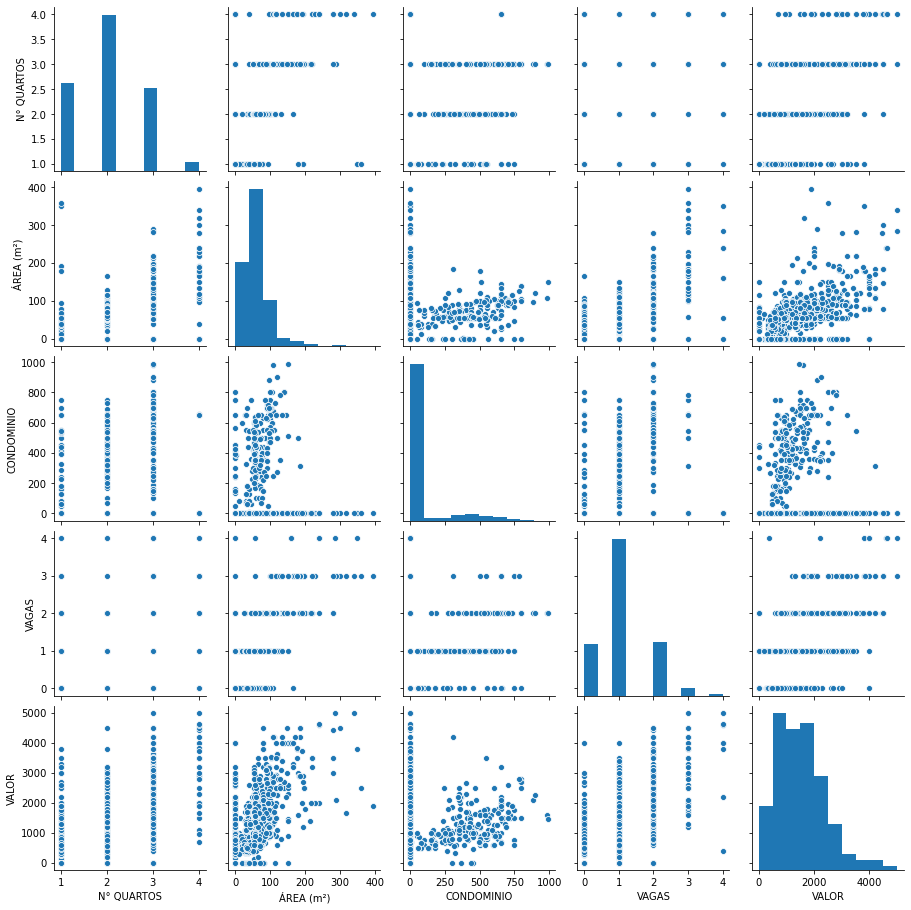

In [54]:
sns.pairplot(df4)

In [74]:
data_x = df4['ENDEREÇO'].unique()

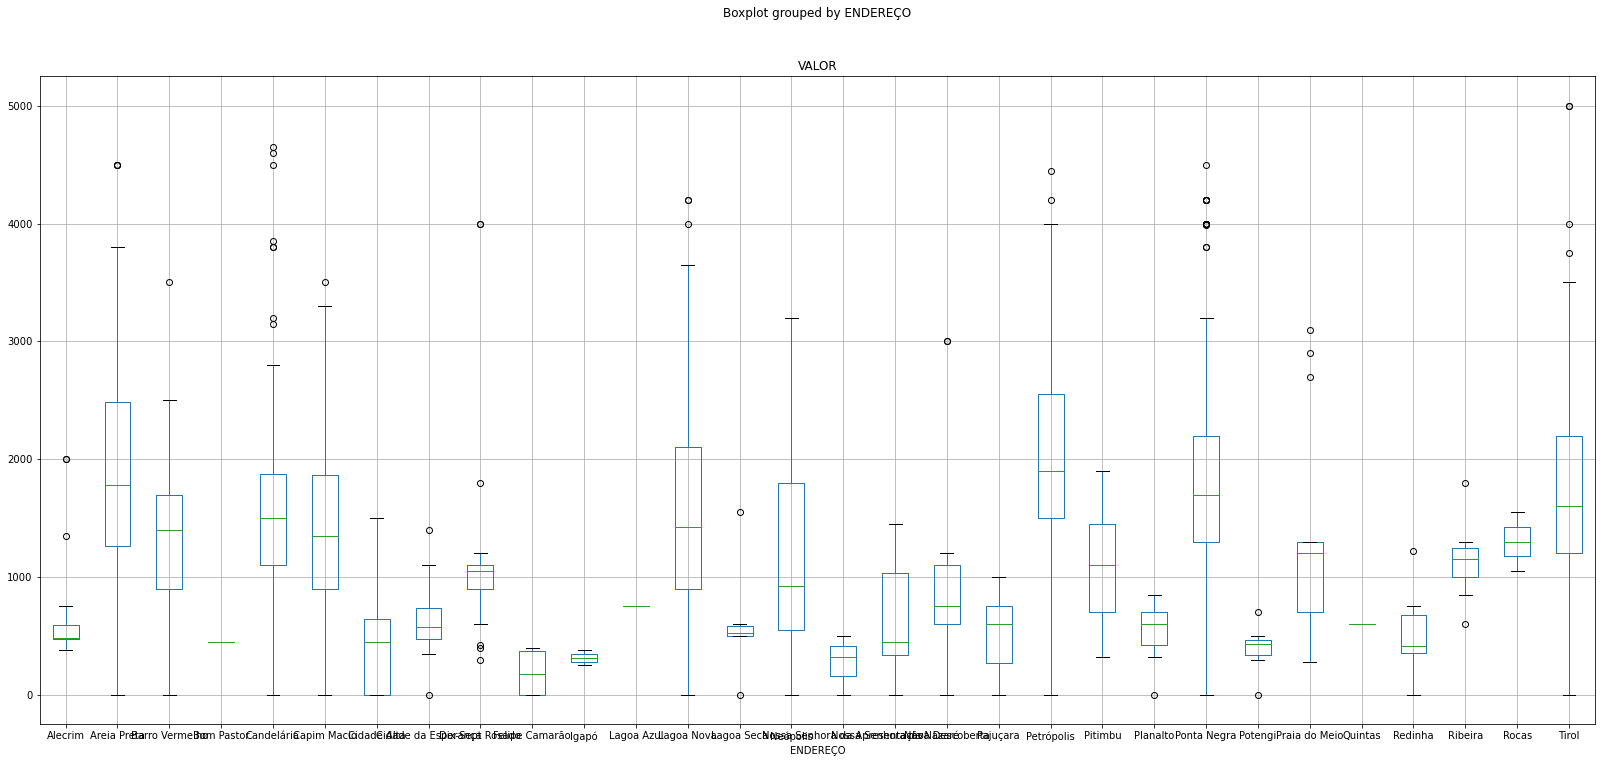

In [83]:
df4.boxplot(column=['VALOR'], by='ENDEREÇO', figsize=(27,12))